In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10


In [2]:
sql= "select * from acc_ord_card_disp_client_dist aocdcd join loan_trans lt on lt.account_id= aocdcd.account_id" 

In [3]:
import mysql.connector as connection
try:
    mydb = connection.connect(host="localhost", database = 'capstone_prj',user="root", passwd="Bangalore",use_pure=True)
    df = pd.read_sql(sql,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))


C:\Users\noble\AppData\Local\Temp\ipykernel_14808\2403804549.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql,mydb)


In [4]:
display (df)

,card_id,disp_id,type,issued,account_id,disposition_client_id,disposition_type,client_id,birth_number,district_id,...,balance,k_symbol,bank,account,loan_id,loan_date,loan_amount,duration,payments,status
0,352,2235,classic,980911 00:00:00,1843,2235,OWNER,2235,405420,14,...,19916.6,UROK,,,5325,930803,105804,36,2939.0,A
1,352,2235,classic,980911 00:00:00,1843,2235,OWNER,2235,405420,14,...,26099.1,,,,5325,930803,105804,36,2939.0,A
2,352,2235,classic,980911 00:00:00,1843,2235,OWNER,2235,405420,14,...,19799.1,,,,5325,930803,105804,36,2939.0,A
3,352,2235,classic,980911 00:00:00,1843,2235,OWNER,2235,405420,14,...,24499.1,SIPO,QR,62958741,5325,930803,105804,36,2939.0,A
4,352,2235,classic,980911 00:00:00,1843,2235,OWNER,2235,405420,14,...,31493.1,UVER,QR,70984434,5325,930803,105804,36,2939.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,1036,9735,classic,970117 00:00:00,8129,10043,OWNER,10043,651029,45,...,700.0,,,,6668,940730,74736,36,2076.0,A
864,1038,9787,junior,950330 00:00:00,8173,10095,OWNER,10095,765206,1,...,54840.0,,GH,84269058,6678,940520,80340,12,6695.0,A
865,1038,9787,junior,950330 00:00:00,8173,10095,OWNER,10095,765206,1,...,14000.0,,,,6678,940520,80340,12,6695.0,A
866,1038,9787,junior,950330 00:00:00,8173,10095,OWNER,10095,765206,1,...,1100.0,,,,6678,940520,80340,12,6695.0,A


In [5]:
display (df.shape)

(868, 50)

In [6]:
df.columns

Index(['card_id', 'disp_id', 'type', 'issued', 'account_id',
       'disposition_client_id', 'disposition_type', 'client_id',
       'birth_number', 'district_id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'order_id',
       'bank_to', 'account_to', 'amount', 'k_symbol', 'account_date',
       'account_district_id', 'frequency', 'trans_id', 'account_id', 'date',
       'type', 'operation', 'amount', 'balance', 'k_symbol', 'bank', 'account',
       'loan_id', 'loan_date', 'loan_amount', 'duration', 'payments',
       'status'],
      dtype='object')

In [7]:
print (df.isnull().sum())  

card_id                  0
disp_id                  0
type                     0
issued                   0
account_id               0
disposition_client_id    0
disposition_type         0
client_id                0
birth_number             0
district_id              0
A1                       0
A2                       0
A3                       0
A4                       0
A5                       0
A6                       0
A7                       0
A8                       0
A9                       0
A10                      0
A11                      0
A12                      0
A13                      0
A14                      0
A15                      0
A16                      0
order_id                 0
bank_to                  0
account_to               0
amount                   0
k_symbol                 0
account_date             0
account_district_id      0
frequency                0
trans_id                 0
account_id               0
date                     0
t

In [8]:
x=df[['loan_amount','balance']].values
display (x)


array([[105804. ,  19916.6],
       [105804. ,  26099.1],
       [105804. ,  19799.1],
       ...,
       [ 80340. ,  14000. ],
       [ 80340. ,   1100. ],
       [ 28248. ,    400. ]])

In [9]:
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()
minmax_x = minmax.fit_transform(x)
print (minmax_x)


[[0.28768316 0.13748826]
 [0.28768316 0.18060021]
 [0.28768316 0.13666891]
 ...
 [0.20733785 0.09623048]
 [0.20733785 0.0062759 ]
 [0.04297452 0.00139464]]


In [10]:
wcss = []
for i in range(2,15):
    kmeans = KMeans (n_clusters =  i , init = 'k-means++')
    kmeans.fit(minmax_x)
    wcss.append (kmeans.inertia_)
display (wcss)


C:\Users\noble\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\noble\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\noble\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\noble\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

[46.11488720910734,
 31.21523516552857,
 24.31074730597313,
 18.947333669717267,
 13.8359496157873,
 11.809061033115466,
 11.623015228924896,
 9.457725695165,
 7.639246106184705,
 6.60464667687509,
 6.164289799360622,
 5.797570502068185,
 5.737309919556996]

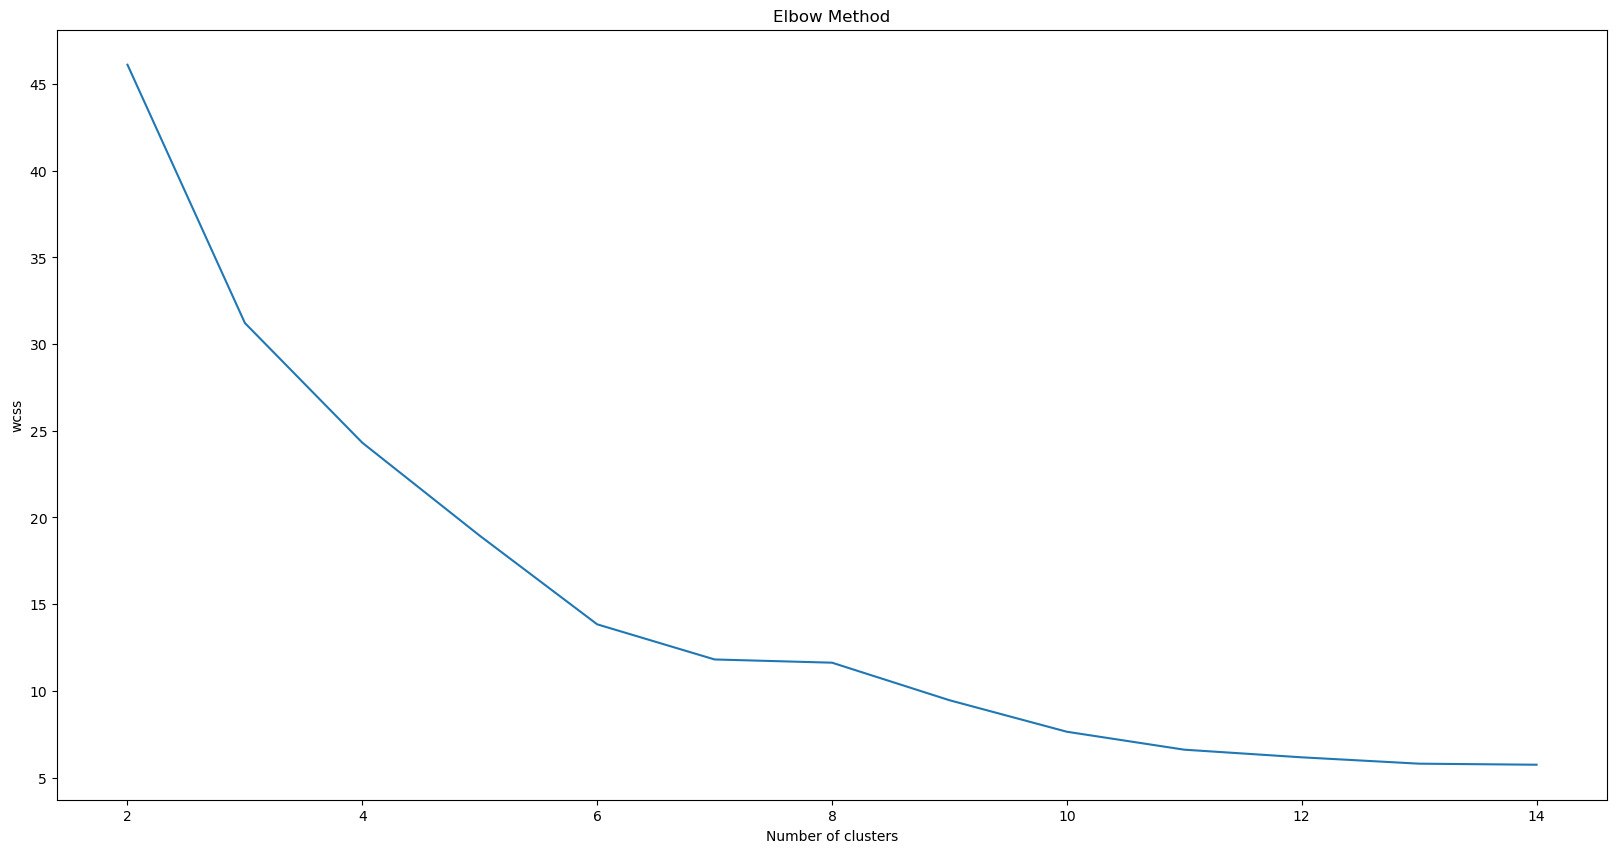

In [11]:
plt.plot (range(2,15),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel ('wcss')
plt.show()


In [12]:
kmeans =  KMeans (n_clusters =  6 , init = 'k-means++')
kmeans = kmeans.fit(minmax_x)
y_kmeans =kmeans.labels_
display (y_kmeans)


C:\Users\noble\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 4, 0,
       4, 4, 0, 0, 0, 3, 3, 4, 0, 4, 4, 0, 0, 0, 3, 3, 4, 0, 4, 4, 0, 0,
       0, 3, 3, 4, 0, 4, 4, 0, 0, 0, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 4, 4, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1,
       1, 1, 1, 1, 5, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 5, 2, 2, 2, 2, 5, 5, 5,
       5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2,
       2, 2, 0, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

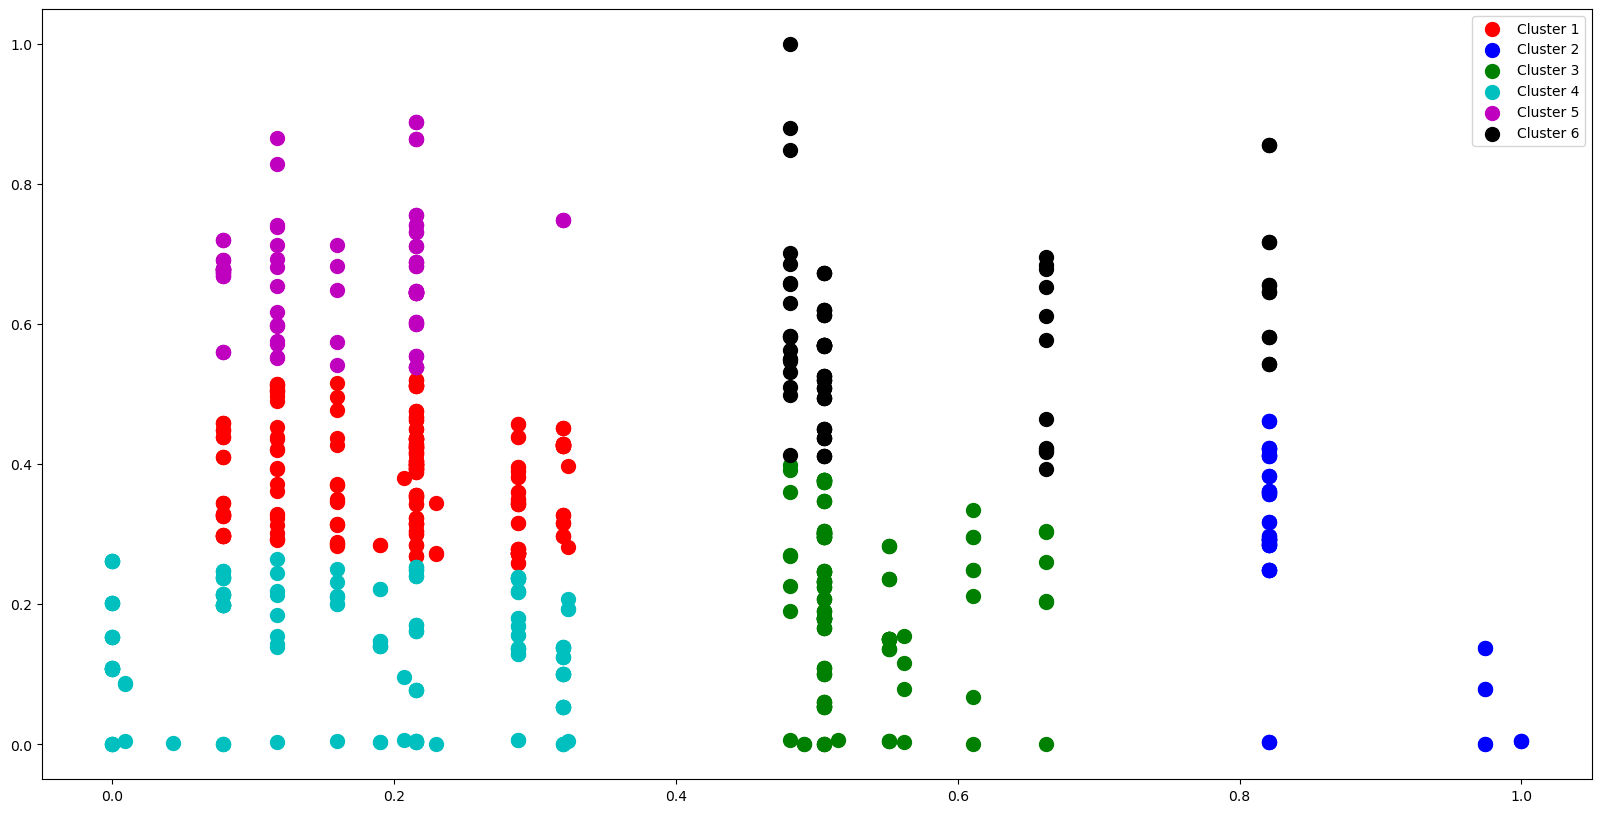

In [13]:

plt.scatter (minmax_x[y_kmeans == 0,0],minmax_x[y_kmeans == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (minmax_x[y_kmeans == 1,0],minmax_x[y_kmeans == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.scatter (minmax_x[y_kmeans == 2,0],minmax_x[y_kmeans == 2,1] ,s = 100, c='g', label = 'Cluster 3')
plt.scatter (minmax_x[y_kmeans == 3,0],minmax_x[y_kmeans == 3,1] ,s = 100, c='c', label = 'Cluster 4')
plt.scatter (minmax_x[y_kmeans == 4,0],minmax_x[y_kmeans == 4,1] ,s = 100, c='m', label = 'Cluster 5')
plt.scatter (minmax_x[y_kmeans == 5,0],minmax_x[y_kmeans == 5,1] ,s = 100, c='k', label = 'Cluster 6')
plt.legend()
plt.show()


In [14]:

x_final=pd.concat([df.iloc[:,4],pd.DataFrame(x), pd.DataFrame(y_kmeans)], axis =1  )
x_final.columns= ['account_id','loan_amount','balance','cluster']
x_final.to_excel('C:\\Noble\\Training\\Course Content\\My SQL\\MY SQL Project Python\\K_Means.xlsx',      index =None)
display (x_final)


,account_id,loan_amount,balance,cluster
0,1843,105804.0,19916.6,3
1,1843,105804.0,26099.1,3
2,1843,105804.0,19799.1,3
3,1843,105804.0,24499.1,3
4,1843,105804.0,31493.1,3
...,...,...,...,...
863,8129,74736.0,700.0,3
864,8173,80340.0,54840.0,0
865,8173,80340.0,14000.0,3
866,8173,80340.0,1100.0,3


In [15]:
display (x_final.cluster.value_counts())

cluster
0    261
3    171
2    158
4    108
5    101
1     69
Name: count, dtype: int64

In [16]:
x_hc=df[['loan_amount','balance']].values
display (x_hc)


array([[105804. ,  19916.6],
       [105804. ,  26099.1],
       [105804. ,  19799.1],
       ...,
       [ 80340. ,  14000. ],
       [ 80340. ,   1100. ],
       [ 28248. ,    400. ]])

In [17]:
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()
minmax_x = minmax.fit_transform(x_hc)
print (minmax_x)


[[0.28768316 0.13748826]
 [0.28768316 0.18060021]
 [0.28768316 0.13666891]
 ...
 [0.20733785 0.09623048]
 [0.20733785 0.0062759 ]
 [0.04297452 0.00139464]]


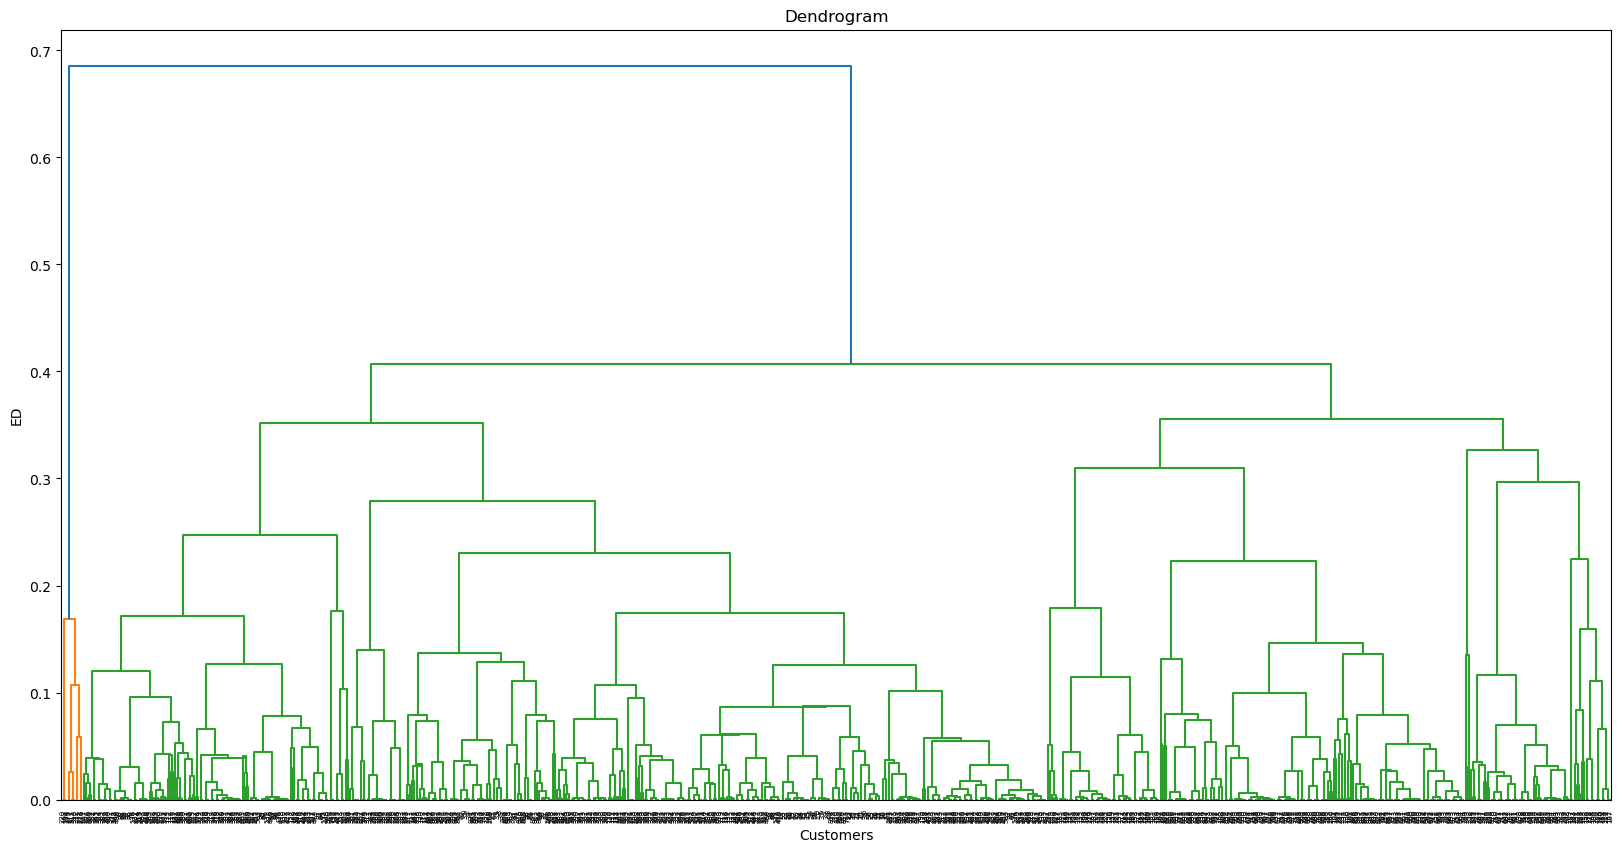

In [18]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(minmax_x, method='centroid'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.show()


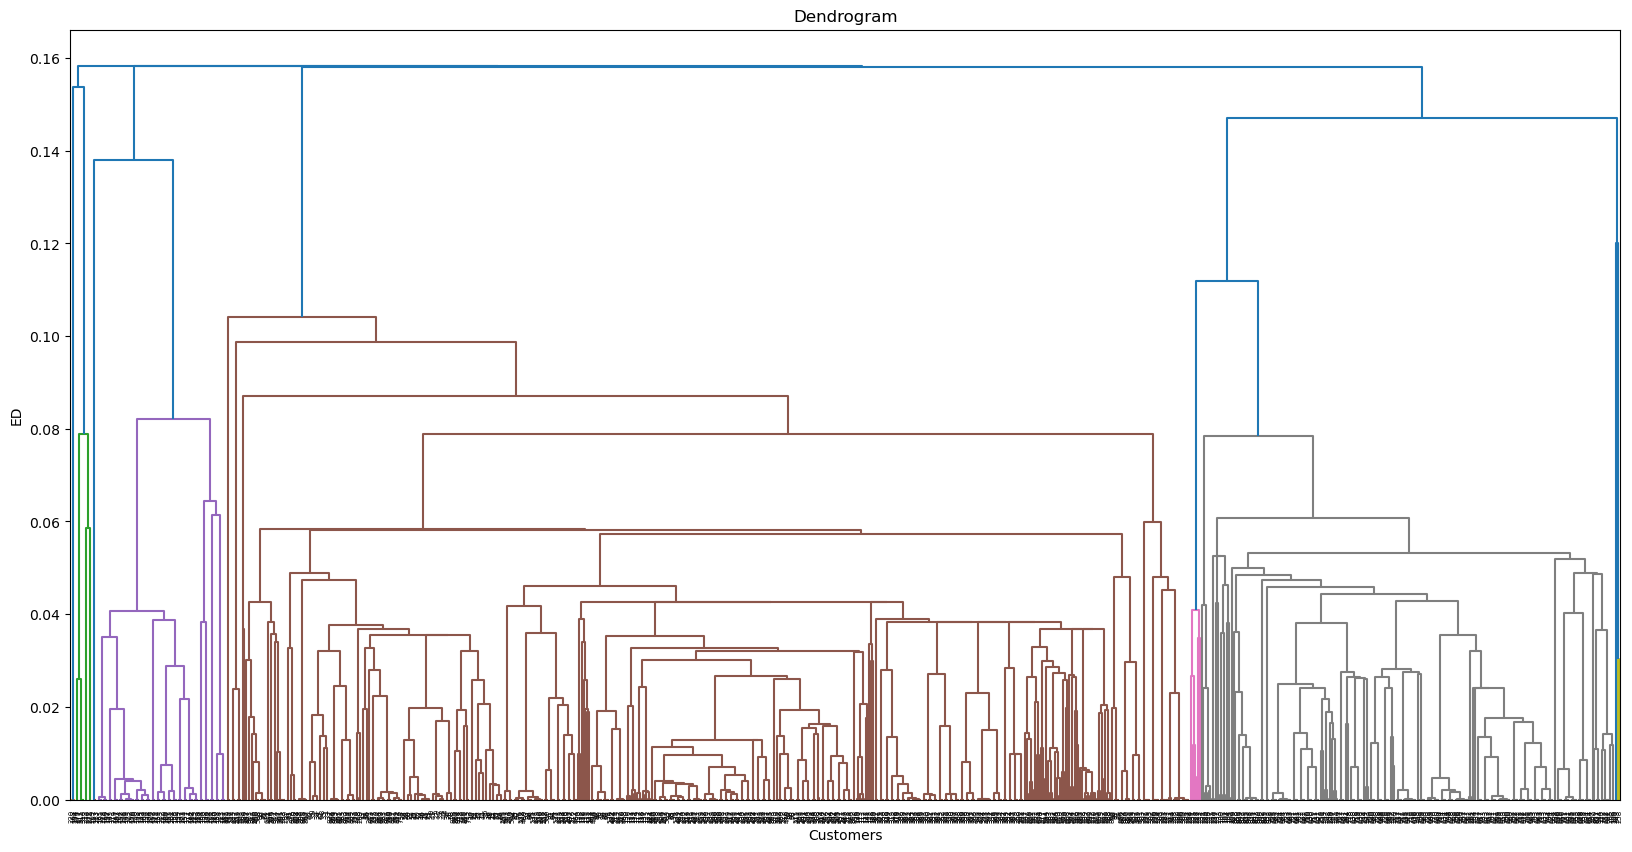

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(minmax_x, method='single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.show()
plt.show()


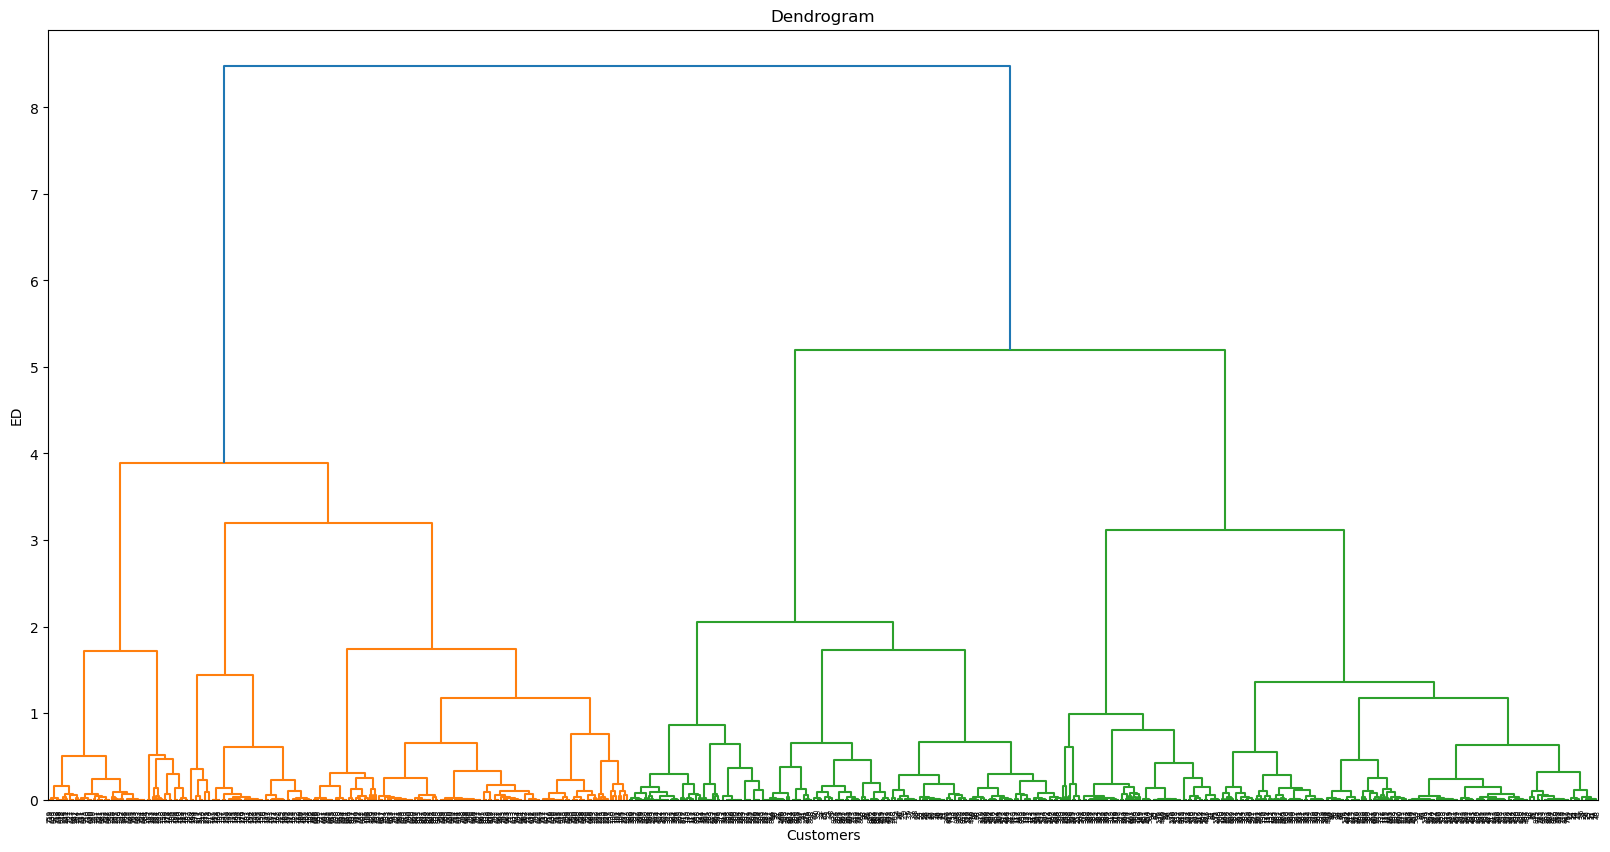

In [20]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(minmax_x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.show()


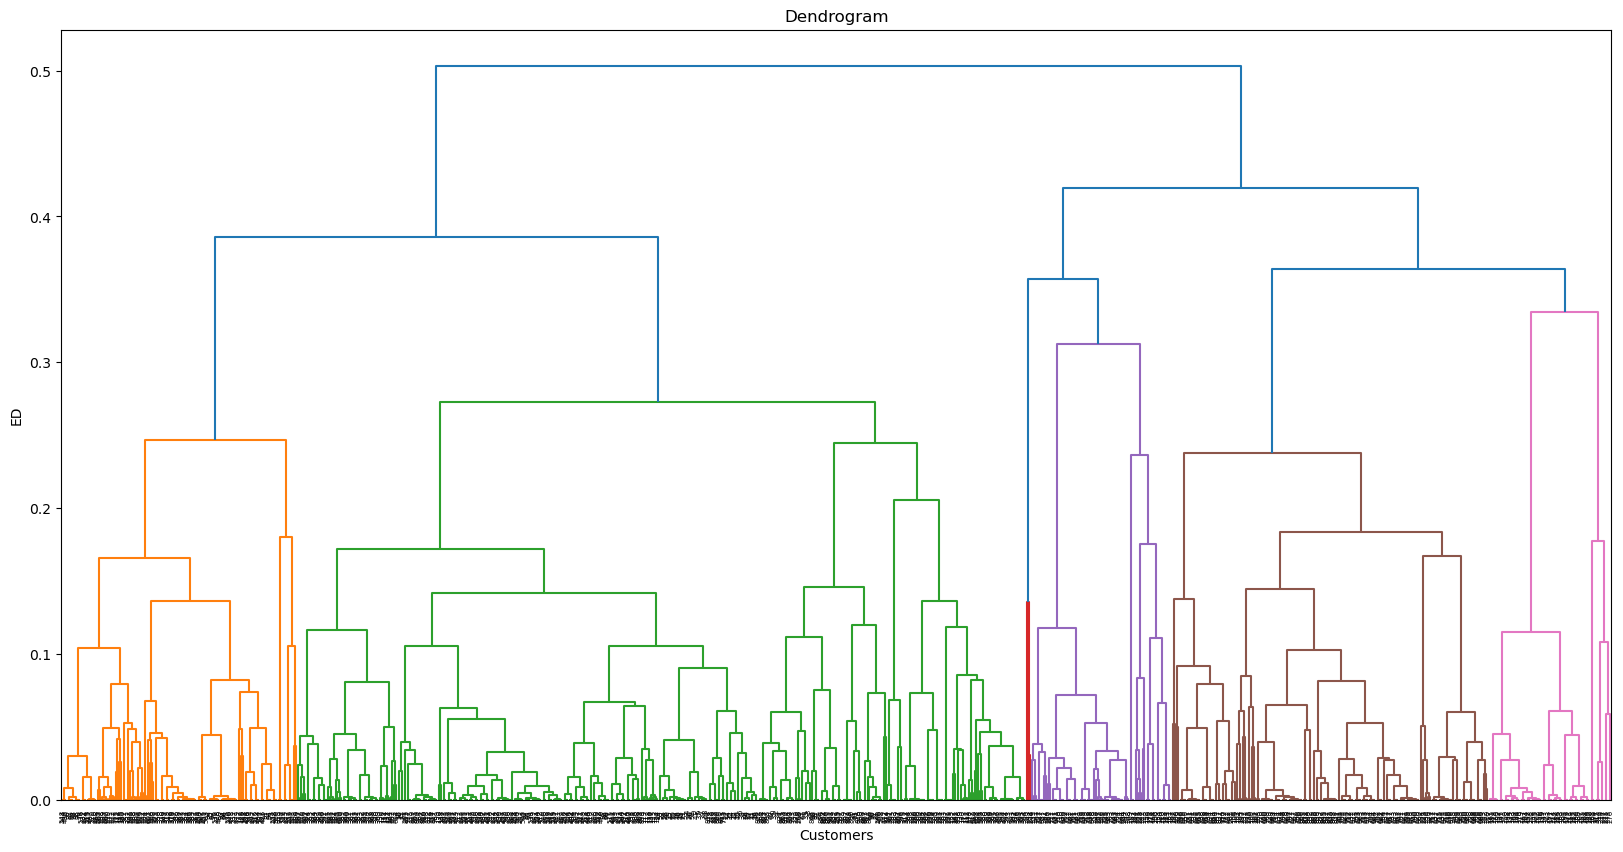

In [21]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(minmax_x, method='average'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.show()


In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(minmax_x)
display (y_hc)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
pd.DataFrame(y_hc).value_counts()

0    543
1    325
Name: count, dtype: int64

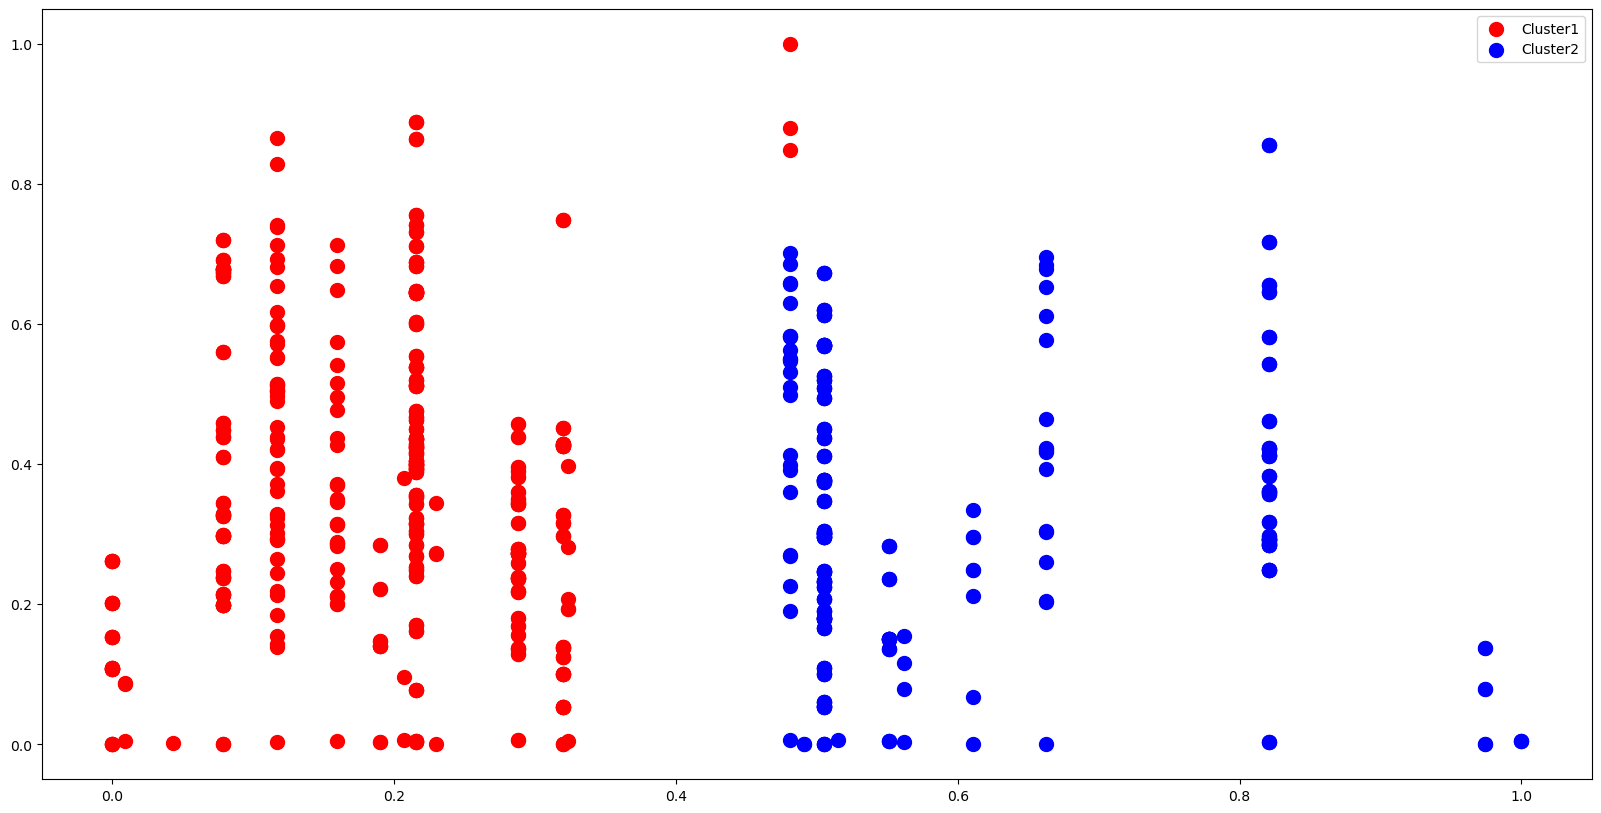

In [24]:
plt.scatter(minmax_x [y_hc==0,0], minmax_x [y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(minmax_x [y_hc==1,0], minmax_x [y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.legend()
plt.show()


In [25]:

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, metric ='euclidean', linkage='average')
y_hc = hc.fit_predict(minmax_x)
display (y_hc)



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
pd.DataFrame(y_hc).value_counts()

1    540
0    328
Name: count, dtype: int64

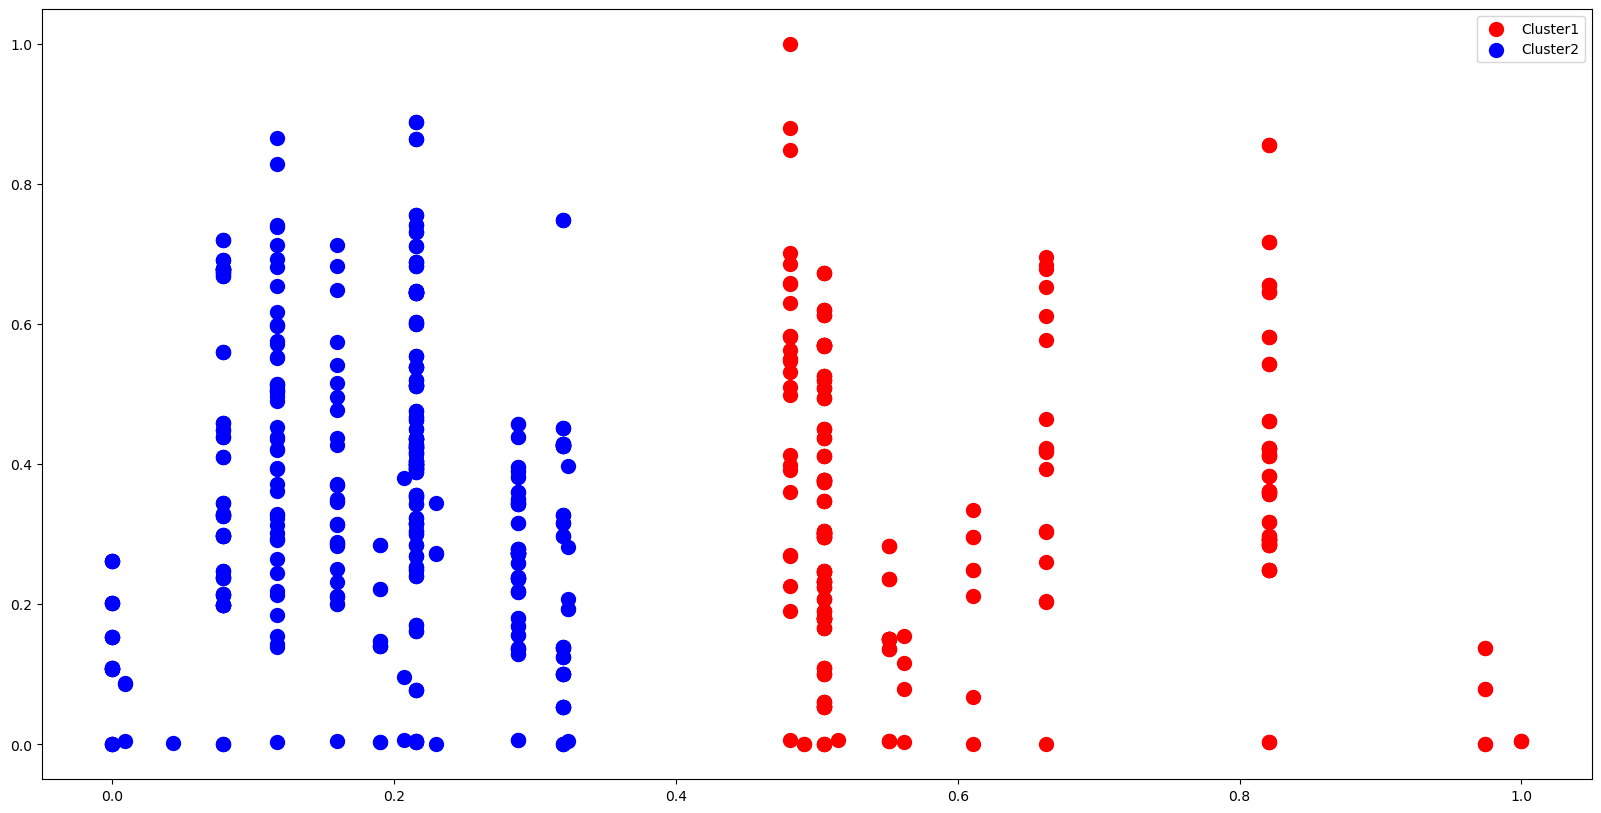

In [27]:
plt.scatter(minmax_x[y_hc==0,0], minmax_x [y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(minmax_x [y_hc==1,0], minmax_x [y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.legend()
plt.show()


In [28]:
xhc_final=pd.concat([df.iloc[:,4],pd.DataFrame(x_hc), pd.DataFrame(y_hc)], axis =1  )
xhc_final.columns= ['account_id','loan_amount','balance','cluster']
xhc_final.to_excel('C:\\Noble\\Training\\Course Content\\My SQL\\MY SQL Project Python\\hc.xlsx',index =None)
display (xhc_final)


,account_id,loan_amount,balance,cluster
0,1843,105804.0,19916.6,1
1,1843,105804.0,26099.1,1
2,1843,105804.0,19799.1,1
3,1843,105804.0,24499.1,1
4,1843,105804.0,31493.1,1
...,...,...,...,...
863,8129,74736.0,700.0,1
864,8173,80340.0,54840.0,1
865,8173,80340.0,14000.0,1
866,8173,80340.0,1100.0,1
